In [1]:
import numpy as np
import pandas as pd


In [4]:
bank=pd.read_csv("C:/DATASETS/bank_reviews3.csv")
bank.head()

,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                996 non-null    object 
 1   date                  1000 non-null   object 
 2   address               1000 non-null   object 
 3   bank                  1000 non-null   object 
 4   rating                1000 non-null   float64
 5   review_title_by_user  1000 non-null   object 
 6   review                1000 non-null   object 
 7   bank_image            1000 non-null   object 
 8   rating_title_by_user  1000 non-null   object 
 9   useful_count          1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


In [8]:
bank.isnull().sum()

author                  4
date                    0
address                 0
bank                    0
rating                  0
review_title_by_user    0
review                  0
bank_image              0
rating_title_by_user    0
useful_count            0
dtype: int64

In [11]:
bank.dropna(inplace=True)

In [12]:
bank.isnull().sum()

author                  0
date                    0
address                 0
bank                    0
rating                  0
review_title_by_user    0
review                  0
bank_image              0
rating_title_by_user    0
useful_count            0
dtype: int64

In [13]:
bank['date']=pd.to_datetime(bank['date'])

In [15]:
bank.describe()

,rating,useful_count
count,996.000000,996.000000
mean,4.354418,2.712851
std,0.940646,7.579122
min,0.500000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,2.000000
max,5.000000,133.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
    

5.0    550
4.0    256
3.0     69
4.5     44
2.0     30
3.5     21
1.0     13
0.5     10
2.5      2
1.5      1
Name: rating, dtype: int64

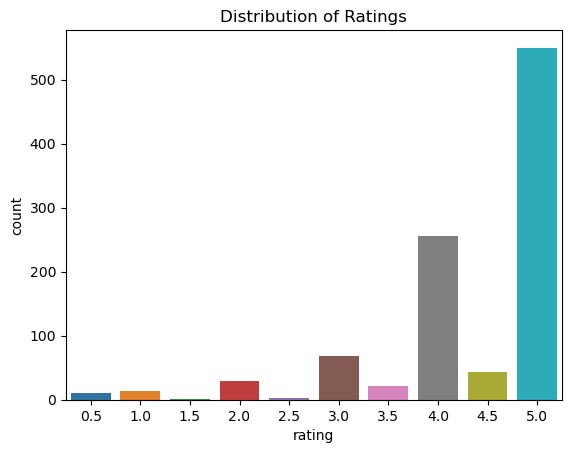

In [18]:
sns.countplot(x='rating', data=bank)
plt.title('Distribution of Ratings')
bank['rating'].value_counts()

Text(0, 0.5, 'Frequency')

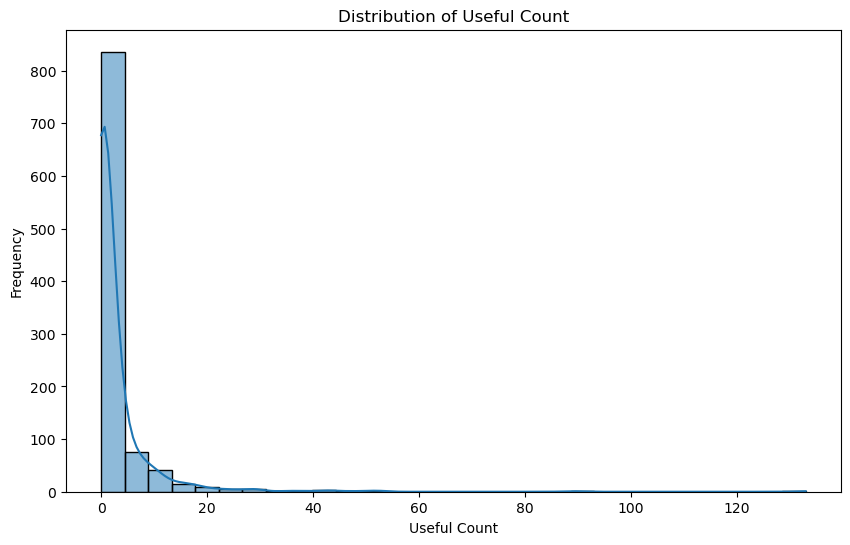

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(bank['useful_count'], bins=30, kde=True)
plt.title('Distribution of Useful Count')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Useful Count')

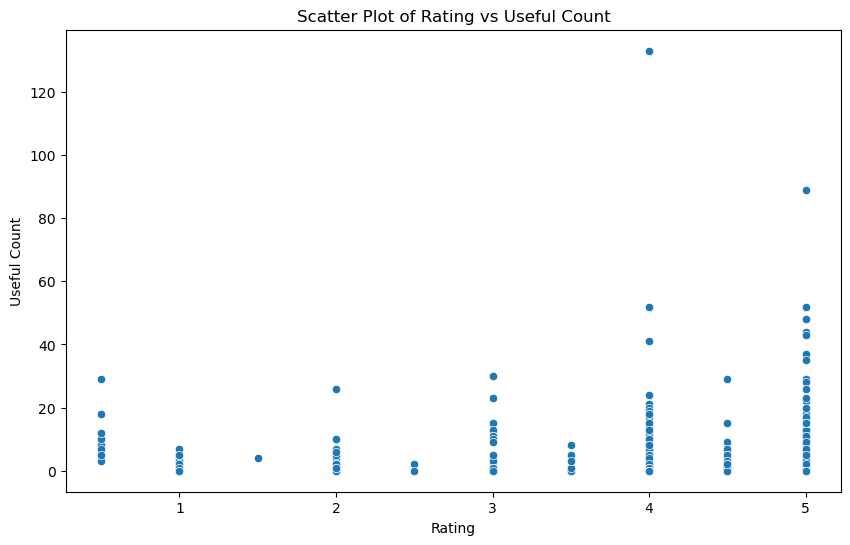

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='useful_count', data=bank)
plt.title('Scatter Plot of Rating vs Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')

In [22]:
bank['review'] = bank['review'].str.replace('[^a-zA-Z0-9\s]', '')

C:\Users\chenn\AppData\Local\Temp\ipykernel_17684\3158163580.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  bank['review'] = bank['review'].str.replace('[^a-zA-Z0-9\s]', '')


Text(0.5, 1.0, 'Word Cloud for Reviews')

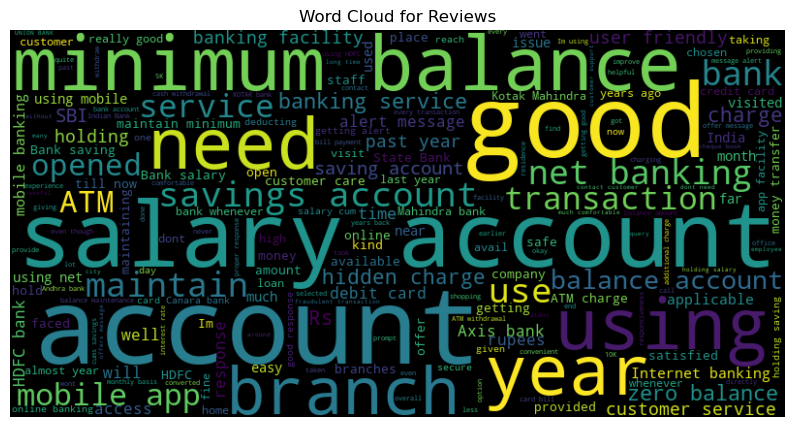

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='black').generate(' '.join(bank['review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Reviews')

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
X_train, X_test, y_train, y_test = train_test_split(bank['review'], bank['rating'], test_size=0.2, random_state=42)

In [35]:
model = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),  # Convert text to numerical features
    ('regressor', RandomForestRegressor(random_state=42)),  # Random Forest Regressor
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mse

0.922271375